In [27]:
import pandas as pd
import numpy as np
import networkx as nx
import ast

schools = pd.read_csv('school_genres.csv')
# PageRank for school genres
# first encode in sparse matrix rep
schools.head()

,Unnamed: 0,SCHOOL,GENRES,PLAYLIST_LINK
0,0,Texas A & M University-College Station,"['reddirt', 'outlawcountry', 'texascountry', '...",https://embed.spotify.com/?uri=spotify:playlis...
1,1,The University of Texas at Austin,"['modernrock', 'indiepop', 'pop', 'indiepoptim...",https://embed.spotify.com/?uri=spotify:playlis...
2,2,Ohio State University-Main Campus,"['pop', 'indiepoptimism', 'modernrock', 'indie...",https://embed.spotify.com/?uri=spotify:playlis...
3,3,University of Central Florida,"['pop', 'poprap', 'rap', 'hiphop', 'electrohou...",https://embed.spotify.com/?uri=spotify:playlis...
4,4,Arizona State University-Tempe,"['edm', 'electrohouse', 'pop', 'electronictrap...",https://embed.spotify.com/?uri=spotify:playlis...


In [24]:
node_score

{'reddirt': {10: 21, 2: 4, 7: 2, 1: 2, 4: 7, 3: 2, 8: 1, 9: 18, 6: 3, 5: 4},
 'outlawcountry': {9: 22,
  3: 5,
  2: 2,
  5: 10,
  1: 4,
  6: 6,
  10: 18,
  7: 2,
  8: 1,
  4: 1},
 'texascountry': {8: 38, 1: 3, 6: 3, 2: 3, 4: 4, 3: 7},
 'anthemworship': {7: 14,
  6: 2,
  10: 33,
  2: 7,
  3: 10,
  5: 7,
  8: 4,
  1: 4,
  9: 20,
  4: 2},
 'indiecoustica': {6: 16,
  3: 19,
  10: 11,
  7: 6,
  5: 8,
  9: 3,
  2: 7,
  1: 6,
  4: 7,
  8: 5},
 'rootsamericana': {5: 11, 7: 2, 3: 2, 1: 3},
 'ccm': {4: 16, 5: 3, 9: 31, 1: 8, 2: 10, 8: 10, 6: 4, 10: 12, 3: 1, 7: 2},
 'countryroad': {3: 21, 2: 8, 9: 49, 6: 20, 4: 10, 7: 16, 8: 17, 5: 9, 1: 7},
 'moderncountryrock': {2: 18,
  7: 25,
  5: 22,
  1: 5,
  6: 8,
  8: 36,
  9: 8,
  4: 9,
  3: 7},
 'contemporarycountry': {1: 19,
  10: 68,
  4: 4,
  7: 23,
  5: 12,
  2: 7,
  9: 10,
  3: 8,
  6: 13,
  8: 3},
 'modernrock': {10: 41,
  8: 29,
  1: 22,
  9: 27,
  7: 16,
  3: 14,
  5: 11,
  2: 17,
  6: 17,
  4: 8},
 'indiepop': {9: 9, 7: 17, 4: 12, 6: 26, 2: 10

In [26]:
co = schools[schools['SCHOOL'].str.contains('Colorado')]
for idx,row in co.iterrows():
    ranking = ast.literal_eval(row['GENRES'])[:5]
    print(row['SCHOOL'])
    print(ranking)

University of Colorado Boulder
['edm', 'electronictrap', 'electrohouse', 'brostep', 'indiepoptimism']
Colorado State University-Fort Collins
['edm', 'modernrock', 'indiepoptimism', 'electrohouse', 'electronictrap']
University of Colorado Denver/Anschutz Medical Campus
['edm', 'electrohouse', 'electronictrap', 'indiepoptimism', 'brostep']
University of Colorado Colorado Springs
['edm', 'indiepoptimism', 'electronictrap', 'electrohouse', 'pop']
University of Northern Colorado
['indiepoptimism', 'modernrock', 'edm', 'electronictrap', 'electrohouse']
Colorado Mesa University
['pop', 'edm', 'poprap', 'indiepoptimism', 'electrohouse']
Colorado School of Mines
['indiepoptimism', 'modernrock', 'indiepop', 'edm', 'indietronica']
Colorado Christian University
['anthemworship', 'indiecoustica', 'ccm', 'worship', 'christianuplift']


In [19]:
ast.literal_eval(schools[schools['SCHOOL']== 'Saint Louis University']['GENRES'][234])

['opm',
 'pinoyindie',
 'pinoyrock',
 'classicopm',
 'pinoyhiphop',
 'pinoyrb',
 'pinoytrap',
 'pinoyalternativerap',
 'poprock',
 'pinoyreggae',
 'acousticopm',
 'pinoypoppunk',
 'pop',
 'worldworship']

In [28]:
G = nx.DiGraph()
added_nodes = set({})
node_score = {}
for idx, row in schools.iterrows():
    ranking = ast.literal_eval(row['GENRES'])[:10]
    rank_set = set(ranking)
    for i in range(len(ranking)):
        new_top = ranking[i]
        if new_top == 'pinoyindie':
            print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
            print(row['SCHOOL'])
            print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
        try:
            node_score[new_top][len(ranking)-i]  += 1
        except:
            try:
                node_score[new_top][len(ranking)-i] = 1
            except:
                node_score[new_top] = {}
                node_score[new_top][len(ranking)-i] = 1
        if new_top not in added_nodes:
            G.add_node(new_top)
        rank_set.remove(new_top)
        edges = [(new_top, lower_node) for lower_node in rank_set]
        for e,v in edges:
            if G.has_edge(e,v):
                G[e][v]['weight'] += 1
            else:
                G.add_edge(e,v, weight = 1)
            
        # Useful if you only need a small sample (for testing mainly)
#     if idx == 10:
#         break

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Saint Louis University
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Xavier University
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [29]:
adj = nx.to_numpy_matrix(G)
nodes=list(G.nodes())

In [30]:
import SpringRank_tools as sr
import tools as tl
network = 'schools'
alpha=0.
l0=1.
l1=1.
'''
Extracts SpringRank
'''
rank=sr.SpringRank(adj,alpha=alpha,l0=l0,l1=l1)

rank=tl.shift_rank(rank)   # (optional) shifts so that the min is in zero and the others are positive

'''
Order results so that the first node is the highest-ranked one
'''
X=[(nodes[i],rank[i]) for i in range(G.number_of_nodes())]
X= sorted(X, key=lambda tup: tup[1],reverse=True)
'''
Prints results
'''
print('SpringRank scores:')
for i in range(100):
    print("{} {}\n".format(X[i][0],X[i][1]))
    print(X[i][0],X[i][1], node_score[X[i][0]])


SpringRank scores:
opm 2.7288143328421137

opm 2.7288143328421137 {10: 2}
arabpop 2.5705353407876284

arabpop 2.5705353407876284 {10: 1, 9: 1}
pinoyindie 2.528814228274234

pinoyindie 2.528814228274234 {9: 2}
lebanesepop 2.3705352362196797

lebanesepop 2.3705352362196797 {9: 1, 8: 1}
jewishpop 2.3467675481471084

jewishpop 2.3467675481471084 {8: 1, 10: 1, 7: 1}
pinoyrock 2.3288141237063384

pinoyrock 2.3288141237063384 {8: 2}
deepindianpop 2.2043103920710228

deepindianpop 2.2043103920710228 {9: 1}
dabke 2.170535131651805

dabke 2.170535131651805 {8: 1, 7: 1}
classicopm 2.128814019138453

classicopm 2.128814019138453 {7: 2}
calirap 2.1028067859211266

calirap 2.1028067859211266 {6: 7, 7: 6, 5: 6, 1: 2, 2: 5, 10: 60, 9: 10, 8: 5, 3: 2, 4: 1}
reddirt 2.069274488296365

reddirt 2.069274488296365 {10: 21, 2: 4, 7: 2, 1: 2, 4: 7, 3: 2, 8: 1, 9: 18, 6: 3, 5: 4}
jawaiian 2.0190810940489037

jawaiian 2.0190810940489037 {7: 2, 1: 1, 6: 2, 5: 4, 10: 6, 4: 1}
outlawcountry 2.0097545622494173

out

In [35]:
pr = pd.Series(nx.pagerank(G))
pr.nlargest(100).to_csv('top_school_genres.csv')

/usr/local/Cellar/python/3.7.5/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


In [31]:
pd.DataFrame(node_score)

,reddirt,outlawcountry,texascountry,anthemworship,indiecoustica,rootsamericana,ccm,countryroad,moderncountryrock,contemporarycountry,...,praise,naijaworship,contemporaryjazz,jazzfusion,contemporarypostbop,neorb,mexicanpop,christianindie,trapespanol,gospelrb
10,21,18,NaN,33,11,NaN,12,NaN,NaN,68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,2,3.0,7,7,NaN,10,8.0,18.0,7,...,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
7,2,2,NaN,14,6,2.0,2,16.0,25.0,23,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,4,3.0,4,6,3.0,8,7.0,5.0,19,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,NaN
4,7,1,4.0,2,7,NaN,16,10.0,9.0,4,...,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
3,2,5,7.0,10,19,2.0,1,21.0,7.0,8,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,1,38.0,4,5,NaN,10,17.0,36.0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
9,18,22,NaN,20,3,NaN,31,49.0,8.0,10,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3,6,3.0,2,16,NaN,4,20.0,8.0,13,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
5,4,10,NaN,7,8,11.0,3,9.0,22.0,12,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


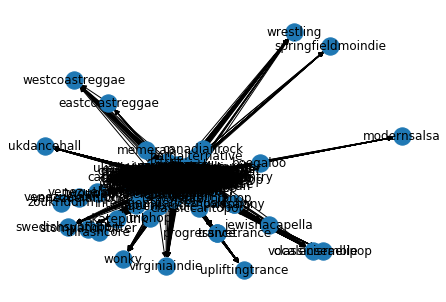

In [7]:
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels = True)

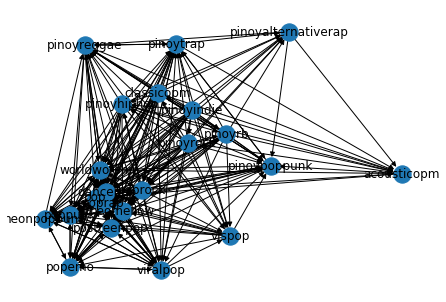

In [9]:
subnodes = list(G.neighbors('pinoyindie'))
subnodes.append('pinoyindie')

S = G.subgraph(subnodes)
pos = nx.spring_layout(S)
nx.draw(S, pos, with_labels = True)